- Deep learning neural network models used for predictive modeling may need to be updated
- This may be because the data has changed since the model was developed and deployed, or it may be the case that additional labeled data has been made available since the model was developed this is referred to as the problem of “concept drift” where the underlying probability distributions of variables and relationships between variables change over time, which can negatively impact the model built from the data and it is expected that the additional data will improve the performance of the model
- There are many ways to update neural network models, although the two main approaches involve either using the existing model as a starting point and retraining it, or leaving the existing model unchanged and combining the predictions from the existing model with a new model


### Retraining Update Strategies

- A benefit of neural network models is that their weights can be updated at any time with continued training
- When responding to changes in the underlying data or the availability of new data, there are a few different strategies to choose from when updating a neural network model, such as:
    - Continue training the model on the new data only
    - Continue training the model on the old and new data
    

##### Before we go any further lets undertsand effect of learning rate, adaptive learning rate and momentum.

- The amount that the weights are updated during training is referred to as the step size or the “learning rate.”
- The learning rate controls how quickly the model is adapted to the problem
- Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs
- A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck
- Momentum
    - Training a neural network can be made easier with the addition of history to the weight update
    - Specifically, an exponentially weighted average of the prior updates to the weight can be included when the weights are updated.
    - This change to stochastic gradient descent is called “momentum” and adds inertia to the update procedure, causing many past updates in one direction to continue in that direction in the future.
    - In other words, The momentum algorithm accumulates an exponentially decaying moving average of past gradients and continues to move in their direction
    - The amount of inertia of past updates is controlled via the addition of a new hyperparameter, often referred to as the “momentum” or “velocity”
    - the momentum algorithm introduces a variable v that plays the role of velocity — it is the direction and speed at which the parameters move through parameter space
    - It has the effect of smoothing the optimization process, slowing updates to continue in the previous direction instead of getting stuck or oscillating
    - Momentum does not make it easier to configure the learning rate, as the step size is independent of the momentum
    - Instead, momentum can improve the speed of the optimization process in concert with the step size

### Learning Rate Schedule

- An alternative to using a fixed learning rate is to instead vary the learning rate over the training process
- The way in which the learning rate changes over time (training epochs) is referred to as the learning rate schedule or learning rate decay

#### Adaptive Learning Rates

- The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response. This is called an adaptive learning rate
-  A good adaptive algorithm will usually converge much faster than simple back-propagation with a poorly chosen fixed learning rate
- The three adapative learning rate algorithms are AdaGrad, RMSProp, and Adam, and all maintain and adapt learning rates for each of the weights in the model

#### The learning rate is perhaps the most important hyperparameter. If you have time to tune only one hyperparameter, tune the learning rate.

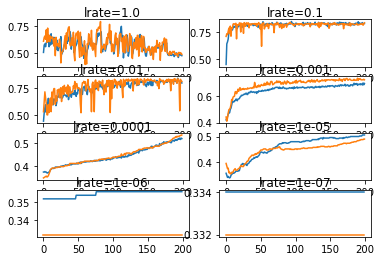

In [2]:
# study of learning rate on accuracy for blobs problem
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

def fit_model(trainX, trainy, testX, testy, lrate):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(lr=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('lrate='+str(lrate), pad=-50)

trainX, trainy, testX, testy = prepare_data()
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for a learning rate
    fit_model(trainX, trainy, testX, testy, learning_rates[i])

pyplot.show()

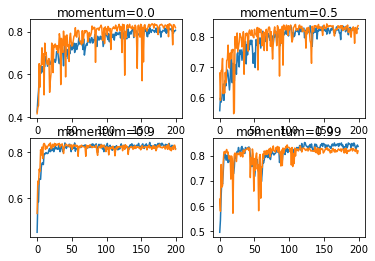

In [4]:
# study of momentum on accuracy for blobs problem
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, momentum):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('momentum='+str(momentum), pad=-80)

# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.9, 0.99]
for i in range(len(momentums)):
    # determine the plot number
    plot_no = 220 + (i+1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for a momentum
    fit_model(trainX, trainy, testX, testy, momentums[i])
# show learning curves
pyplot.show()

#### Types of learning rate schedules

### Learning Rate Decay

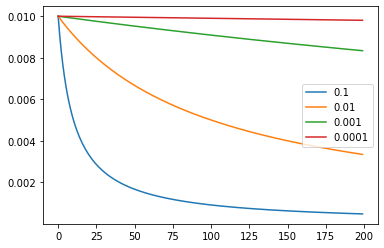

In [5]:
# demonstrate the effect of decay on the learning rate
from matplotlib import pyplot

# learning rate decay
def	decay_lrate(initial_lrate, decay, iteration):
    return initial_lrate * (1.0 / (1.0 + decay * iteration))

decays = [1E-1, 1E-2, 1E-3, 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays:
    # calculate learning rates for updates
    lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
    # plot result
    pyplot.plot(lrates, label=str(decay))
pyplot.legend()
pyplot.show()

- As decay rate increases the learning rate drastically reduces across number of iterations

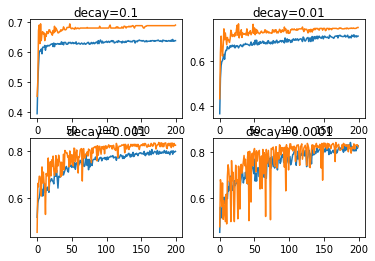

In [7]:
# study of decay rate on accuracy for blobs problem
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, decay):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('decay='+str(decay), pad=-80)

# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different decay rates
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]
for i in range(len(decay_rates)):
    # determine the plot number
    plot_no = 220 + (i+1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for a decay rate
    fit_model(trainX, trainy, testX, testy, decay_rates[i])
# show learning curves
pyplot.show()

#### Effect of Adaptive Learning Rates

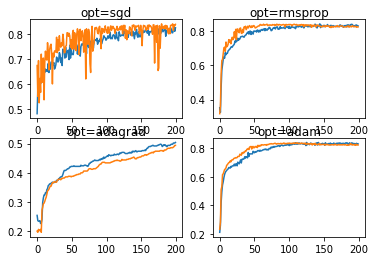

In [9]:
# study of sgd with adaptive learning rates in the blobs problem
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend
from matplotlib import pyplot

# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, optimizer):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('opt='+optimizer, pad=-80)

# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different optimizers
momentums = ['sgd', 'rmsprop', 'adagrad', 'adam']
for i in range(len(momentums)):
    # determine the plot number
    plot_no = 220 + (i+1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for an optimizer
    fit_model(trainX, trainy, testX, testy, momentums[i])
# show learning curves
pyplot.show()

##### We can see that SGD with a default learning rate of 0.01 and no momentum does learn the problem, but requires nearly all 200 epochs and results in volatile accuracy on the training data and much more so on the test dataset. The plots show that all three adaptive learning rate methods learning the problem faster and with dramatically less volatility in train and test set accuracy.

### Update Model on New Data Only

- We can update the model on the new data only
- One extreme version of this approach is to not use any new data and simply re-train the model on the old data. This might be the same as “do nothing” in response to the new data. At the other extreme, a model could be fit on the new data only, discarding the old data and old model
- Or,Update existing model on new data

In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# record the number of input features in the data
n_features = X.shape[1]
# split into old and new data
X_old, X_new, y_old, y_new = train_test_split(X, y, test_size=0.50, random_state=1)
# define the model
model = Sequential()
model.add(Dense(20, kernel_initializer='he_normal', activation='relu', input_dim=n_features))
model.add(Dense(10, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# define the optimization algorithm
opt = SGD(learning_rate=0.01, momentum=0.9)
# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy')
# fit the model on old data
model.fit(X_old, y_old, epochs=150, batch_size=32, verbose=2)
# save model...
model.save("model.h5")

Epoch 1/150
16/16 - 0s - loss: 0.8000
Epoch 2/150
16/16 - 0s - loss: 0.4236
Epoch 3/150
16/16 - 0s - loss: 0.3326
Epoch 4/150
16/16 - 0s - loss: 0.2784
Epoch 5/150
16/16 - 0s - loss: 0.2336
Epoch 6/150
16/16 - 0s - loss: 0.2114
Epoch 7/150
16/16 - 0s - loss: 0.1860
Epoch 8/150
16/16 - 0s - loss: 0.1537
Epoch 9/150
16/16 - 0s - loss: 0.1414
Epoch 10/150
16/16 - 0s - loss: 0.1232
Epoch 11/150
16/16 - 0s - loss: 0.1103
Epoch 12/150
16/16 - 0s - loss: 0.1052
Epoch 13/150
16/16 - 0s - loss: 0.0929
Epoch 14/150
16/16 - 0s - loss: 0.0830
Epoch 15/150
16/16 - 0s - loss: 0.0761
Epoch 16/150
16/16 - 0s - loss: 0.0695
Epoch 17/150
16/16 - 0s - loss: 0.0643
Epoch 18/150
16/16 - 0s - loss: 0.0604
Epoch 19/150
16/16 - 0s - loss: 0.0554
Epoch 20/150
16/16 - 0s - loss: 0.0486
Epoch 21/150
16/16 - 0s - loss: 0.0485
Epoch 22/150
16/16 - 0s - loss: 0.0436
Epoch 23/150
16/16 - 0s - loss: 0.0371
Epoch 24/150
16/16 - 0s - loss: 0.0351
Epoch 25/150
16/16 - 0s - loss: 0.0325
Epoch 26/150
16/16 - 0s - loss: 0.

In [14]:
from tensorflow.keras.models import load_model

# load model...
model = load_model('model.h5')
# update model on new data only with a smaller learning rate
opt = SGD(learning_rate=0.001, momentum=0.9)
# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy')
# fit the model on new data
model.fit(X_new, y_new, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
16/16 - 0s - loss: 0.4876
Epoch 2/100
16/16 - 0s - loss: 0.3976
Epoch 3/100
16/16 - 0s - loss: 0.3308
Epoch 4/100
16/16 - 0s - loss: 0.2794
Epoch 5/100
16/16 - 0s - loss: 0.2506
Epoch 6/100
16/16 - 0s - loss: 0.2271
Epoch 7/100
16/16 - 0s - loss: 0.2070
Epoch 8/100
16/16 - 0s - loss: 0.1867
Epoch 9/100
16/16 - 0s - loss: 0.1749
Epoch 10/100
16/16 - 0s - loss: 0.1654
Epoch 11/100
16/16 - 0s - loss: 0.1537
Epoch 12/100
16/16 - 0s - loss: 0.1463
Epoch 13/100
16/16 - 0s - loss: 0.1375
Epoch 14/100
16/16 - 0s - loss: 0.1307
Epoch 15/100
16/16 - 0s - loss: 0.1238
Epoch 16/100
16/16 - 0s - loss: 0.1180
Epoch 17/100
16/16 - 0s - loss: 0.1125
Epoch 18/100
16/16 - 0s - loss: 0.1097
Epoch 19/100
16/16 - 0s - loss: 0.1045
Epoch 20/100
16/16 - 0s - loss: 0.1013
Epoch 21/100
16/16 - 0s - loss: 0.0980
Epoch 22/100
16/16 - 0s - loss: 0.0937
Epoch 23/100
16/16 - 0s - loss: 0.0909
Epoch 24/100
16/16 - 0s - loss: 0.0871
Epoch 25/100
16/16 - 0s - loss: 0.0846
Epoch 26/100
16/16 - 0s - loss: 0.

### Update Model on Old and New Data

In [16]:
from numpy import vstack
from numpy import hstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# record the number of input features in the data
n_features = X.shape[1]
# split into old and new data
X_old, X_new, y_old, y_new = train_test_split(X, y, test_size=0.50, random_state=1)
# define the model
model = Sequential()
model.add(Dense(20, kernel_initializer='he_normal', activation='relu', input_dim=n_features))
model.add(Dense(10, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# define the optimization algorithm
opt = SGD(learning_rate=0.01, momentum=0.9)
# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy')
# fit the model on old data
model.fit(X_old, y_old, epochs=150, batch_size=32, verbose=2)
 
# save model...
model.save("model1.h5")

Epoch 1/150
16/16 - 0s - loss: 0.8583
Epoch 2/150
16/16 - 0s - loss: 0.4794
Epoch 3/150
16/16 - 0s - loss: 0.3780
Epoch 4/150
16/16 - 0s - loss: 0.3121
Epoch 5/150
16/16 - 0s - loss: 0.2603
Epoch 6/150
16/16 - 0s - loss: 0.2123
Epoch 7/150
16/16 - 0s - loss: 0.1910
Epoch 8/150
16/16 - 0s - loss: 0.1730
Epoch 9/150
16/16 - 0s - loss: 0.1511
Epoch 10/150
16/16 - 0s - loss: 0.1355
Epoch 11/150
16/16 - 0s - loss: 0.1250
Epoch 12/150
16/16 - 0s - loss: 0.1128
Epoch 13/150
16/16 - 0s - loss: 0.1051
Epoch 14/150
16/16 - 0s - loss: 0.0957
Epoch 15/150
16/16 - 0s - loss: 0.0911
Epoch 16/150
16/16 - 0s - loss: 0.0846
Epoch 17/150
16/16 - 0s - loss: 0.0782
Epoch 18/150
16/16 - 0s - loss: 0.0720
Epoch 19/150
16/16 - 0s - loss: 0.0688
Epoch 20/150
16/16 - 0s - loss: 0.0668
Epoch 21/150
16/16 - 0s - loss: 0.0617
Epoch 22/150
16/16 - 0s - loss: 0.0560
Epoch 23/150
16/16 - 0s - loss: 0.0553
Epoch 24/150
16/16 - 0s - loss: 0.0508
Epoch 25/150
16/16 - 0s - loss: 0.0484
Epoch 26/150
16/16 - 0s - loss: 0.

In [17]:
# load model...
model = load_model('model1.h5')
# update model with a smaller learning rate
opt = SGD(learning_rate=0.001, momentum=0.9)
# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy')
# create a composite dataset of old and new data
X_both, y_both = vstack((X_old, X_new)), hstack((y_old, y_new))
# fit the model on new data
model.fit(X_both, y_both, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 0.2597
Epoch 2/100
32/32 - 0s - loss: 0.2032
Epoch 3/100
32/32 - 0s - loss: 0.1688
Epoch 4/100
32/32 - 0s - loss: 0.1412
Epoch 5/100
32/32 - 0s - loss: 0.1202
Epoch 6/100
32/32 - 0s - loss: 0.1072
Epoch 7/100
32/32 - 0s - loss: 0.0928
Epoch 8/100
32/32 - 0s - loss: 0.0820
Epoch 9/100
32/32 - 0s - loss: 0.0724
Epoch 10/100
32/32 - 0s - loss: 0.0652
Epoch 11/100
32/32 - 0s - loss: 0.0603
Epoch 12/100
32/32 - 0s - loss: 0.0550
Epoch 13/100
32/32 - 0s - loss: 0.0495
Epoch 14/100
32/32 - 0s - loss: 0.0461
Epoch 15/100
32/32 - 0s - loss: 0.0434
Epoch 16/100
32/32 - 0s - loss: 0.0404
Epoch 17/100
32/32 - 0s - loss: 0.0384
Epoch 18/100
32/32 - 0s - loss: 0.0356
Epoch 19/100
32/32 - 0s - loss: 0.0340
Epoch 20/100
32/32 - 0s - loss: 0.0323
Epoch 21/100
32/32 - 0s - loss: 0.0316
Epoch 22/100
32/32 - 0s - loss: 0.0300
Epoch 23/100
32/32 - 0s - loss: 0.0286
Epoch 24/100
32/32 - 0s - loss: 0.0277
Epoch 25/100
32/32 - 0s - loss: 0.0272
Epoch 26/100
32/32 - 0s - loss: 0.

### Ensemble Update Strategies

- An ensemble is a predictive model that is composed of multiple other models
- There are many different types of ensemble models, although perhaps the simplest approach is to average the predictions from multiple different models

#### Ensemble Model With Model on New Data Only

In [21]:
from numpy import hstack
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# record the number of input features in the data
n_features = X.shape[1]
# split into old and new data
X_old, X_new, y_old, y_new = train_test_split(X, y, test_size=0.50, random_state=1)
# define the old model
old_model = Sequential()
old_model.add(Dense(20, kernel_initializer='he_normal', activation='relu', input_dim=n_features))
old_model.add(Dense(10, kernel_initializer='he_normal', activation='relu'))
old_model.add(Dense(1, activation='sigmoid'))
# define the optimization algorithm
opt = SGD(learning_rate=0.01, momentum=0.9)
# compile the model
old_model.compile(optimizer=opt, loss='binary_crossentropy')
# fit the model on old data
old_model.fit(X_old, y_old, epochs=200, batch_size=128, verbose=2)
# save model...
model.save("model2.h5")


Epoch 1/200
40/40 - 0s - loss: 0.5278
Epoch 2/200
40/40 - 0s - loss: 0.3716
Epoch 3/200
40/40 - 0s - loss: 0.3030
Epoch 4/200
40/40 - 0s - loss: 0.2522
Epoch 5/200
40/40 - 0s - loss: 0.2147
Epoch 6/200
40/40 - 0s - loss: 0.1856
Epoch 7/200
40/40 - 0s - loss: 0.1671
Epoch 8/200
40/40 - 0s - loss: 0.1500
Epoch 9/200
40/40 - 0s - loss: 0.1396
Epoch 10/200
40/40 - 0s - loss: 0.1417
Epoch 11/200
40/40 - 0s - loss: 0.1240
Epoch 12/200
40/40 - 0s - loss: 0.1148
Epoch 13/200
40/40 - 0s - loss: 0.1114
Epoch 14/200
40/40 - 0s - loss: 0.1136
Epoch 15/200
40/40 - 0s - loss: 0.1036
Epoch 16/200
40/40 - 0s - loss: 0.0990
Epoch 17/200
40/40 - 0s - loss: 0.0975
Epoch 18/200
40/40 - 0s - loss: 0.0941
Epoch 19/200
40/40 - 0s - loss: 0.0967
Epoch 20/200
40/40 - 0s - loss: 0.0941
Epoch 21/200
40/40 - 0s - loss: 0.1082
Epoch 22/200
40/40 - 0s - loss: 0.0875
Epoch 23/200
40/40 - 0s - loss: 0.0842
Epoch 24/200
40/40 - 0s - loss: 0.0823
Epoch 25/200
40/40 - 0s - loss: 0.0829
Epoch 26/200
40/40 - 0s - loss: 0.

In [23]:
# load model...
old_model = load_model('model2.h5')

# define the new model
new_model = Sequential()
new_model.add(Dense(20, kernel_initializer='he_normal', activation='relu', input_dim=n_features))
new_model.add(Dense(10, kernel_initializer='he_normal', activation='relu'))
new_model.add(Dense(1, activation='sigmoid'))
# define the optimization algorithm
opt = SGD(learning_rate=0.01, momentum=0.9)
# compile the model
new_model.compile(optimizer=opt, loss='binary_crossentropy')
# fit the model on old data
new_model.fit(X_new, y_new, epochs=200, batch_size=128, verbose=2)
 
# make predictions with both models
yhat1 = old_model.predict(X_new)
print(yhat1)
print(len(yhat1))
yhat2 = new_model.predict(X_new)
print(yhat2)
print(len(yhat2))
# combine predictions into single array
combined = hstack((yhat1, yhat2))
print(combined)
# calculate outcome as mean of predictions
yhat = mean(combined, axis=-1)
print(yhat)

Epoch 1/200
40/40 - 0s - loss: 0.6473
Epoch 2/200
40/40 - 0s - loss: 0.4256
Epoch 3/200
40/40 - 0s - loss: 0.3626
Epoch 4/200
40/40 - 0s - loss: 0.3215
Epoch 5/200
40/40 - 0s - loss: 0.2897
Epoch 6/200
40/40 - 0s - loss: 0.2684
Epoch 7/200
40/40 - 0s - loss: 0.2535
Epoch 8/200
40/40 - 0s - loss: 0.2363
Epoch 9/200
40/40 - 0s - loss: 0.2244
Epoch 10/200
40/40 - 0s - loss: 0.2112
Epoch 11/200
40/40 - 0s - loss: 0.2012
Epoch 12/200
40/40 - 0s - loss: 0.1902
Epoch 13/200
40/40 - 0s - loss: 0.1791
Epoch 14/200
40/40 - 0s - loss: 0.1708
Epoch 15/200
40/40 - 0s - loss: 0.1647
Epoch 16/200
40/40 - 0s - loss: 0.1577
Epoch 17/200
40/40 - 0s - loss: 0.1492
Epoch 18/200
40/40 - 0s - loss: 0.1447
Epoch 19/200
40/40 - 0s - loss: 0.1327
Epoch 20/200
40/40 - 0s - loss: 0.1261
Epoch 21/200
40/40 - 0s - loss: 0.1242
Epoch 22/200
40/40 - 0s - loss: 0.1177
Epoch 23/200
40/40 - 0s - loss: 0.1159
Epoch 24/200
40/40 - 0s - loss: 0.1087
Epoch 25/200
40/40 - 0s - loss: 0.1035
Epoch 26/200
40/40 - 0s - loss: 0.